# <span style= 'color: green'> **Where should I live?** </span> <br>
## Leveraging Data to Optimize Quality of Life Choices
### Group Project of Programming for Data Science 2025/26 <br>
Angelica Lamberti 20250999 <br>
Samuel Nazzaro 20251152 <br>
Efe Oksuzz <br>
Maddleine Rimmer

 <span style= 'color: red'>**Introduction** </span> <br> In the wake of increasing mobility across Europe, fueled by remote work, international education, and shifting social and economic priorities, there has been growing demand for tools that help citizens make better-informed decisions about where to live. <br>
 <span style= 'color: red'> **Objectives** </span> <br>
-Design a tool that translates complex country-level data into clear, actionable insights for everyday people: students seeking affordable education, professionals looking for better work-life balance, retirees interested in safety and healthcare, and more. <br>
-Simplify this decision-making process by analyzing key characteristics of European countries, such as cost of living, safety, and employment. Through exploratory analysis, visualizations, and interpretable insights, the goal is to build a framework that empowers users to evaluate which countries align best with their personal values and life goals.

In [72]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re 

## <span style= 'color: blue'> 1.  Data wrangling and analysis </span>

As a first step, our dataset (which is in a 'csv' format) is imported in Python.

In [73]:
data= pd.read_csv('city_data.csv', sep='|', header=1, parse_dates=['Last Data Update'])

num_rows, num_cols = data.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

data.head()

The dataset has 86 rows and 14 columns.


,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17


### **Exploratory Analysis**
**Question 1** How did you handle missing values and duplicate records in the dataset? 

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             86 non-null     object        
 1   Population Density               85 non-null     float64       
 2   Population                       86 non-null     int64         
 3   Working Age Population           85 non-null     float64       
 4   Youth Dependency Ratio           86 non-null     float64       
 5   Unemployment Rate                85 non-null     float64       
 6   GDP per Capita                   85 non-null     float64       
 7   Days of very strong heat stress  86 non-null     int64         
 8   Main Spoken Languages            85 non-null     object        
 9   Average Monthly Salary           86 non-null     int64         
 10  Avgerage Rent Price              86 non-null     int64         


Since the Average Price Groceries column contains more than 90% missing values, it provides limited analytical value. Therefore, this variable will be excluded from further analysis. To preserve the integrity of the original dataset, a copy—named data_copy—is created, and all the changes will be applied to this duplicate.

In [75]:
data_copy=data.drop('Average Price Groceries', axis=1)
data_copy = data_copy.rename(columns={"Avgerage Rent Price": "Average Rent Price"})
data_copy

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08


What about duplicate records?

In [76]:
data_copy['City'].describe()

count                  86
unique                 84
top       Berlin. Germany
freq                    2
Name: City, dtype: object

In [77]:
data_copy['City'].value_counts()

City
Berlin. Germany           2
Malaga, Spain             2
Vienna, Austria           1
Rotterdam, Netherlands    1
The Hague, Netherlands    1
                         ..
Madrid, Spain             1
Odense, Denmark           1
Copenhagen, Denmark       1
Hanover, Germany          1
Adana, Turkiye            1
Name: count, Length: 84, dtype: int64

The entries ‘Berlin, Germany’ and ‘Malaga, Spain’ appear twice in the dataset, indicating the potential presence of duplicate records. The next step is to verify whether these entries contain the same information. For this purpose, we will apply text-mining techniques to clean the dataset and have a more efficient access to its content. <br>
In particular, since the ‘City’ column contains two distinct pieces of information—city and country—we aim to split it into two separate columns: one representing the city and the other the country.

In [78]:
citycountry_list=data_copy['City'].unique()
print (citycountry_list)

['Vienna, Austria' 'Salzburg, Austria' 'Brussels, Belgium'
 'Antwerp, Belgium' 'Gent, Belgium' 'Bruges, Belgium' 'Sofia, Bulgaria'
 'Dobrich, Bulgaria' 'Zurich, Switzerland' 'Geneva, Switzerland'
 'Basel, Switzerland' 'Lefkosia, Cyprus' 'Lemesos;Cyprus'
 'Prague, Czechia' 'Ostrava, Czechia' 'Berlin. Germany' 'Hamburg, Germany'
 'Munich, Germany' 'Cologne, Germany' 'Frankfurt am Main, Germany'
 'Stuttgart, Germany' 'Leipzig, Germany' 'Dresden, Germany'
 'Dusseldorf, Germany' 'Hanover, Germany' 'Copenhagen, Denmark'
 'Odense, Denmark' 'Madrid, Spain' 'Barcelona, Spain' 'Valencia, Spain'
 'Seville, Spain' 'Malaga, Spain' 'Tallinn, Estonia' 'Helsinki, Finland'
 'Tampere, Finland' 'Paris, France' 'Lyon,  France' 'Toulouse, France'
 'London, United Kingdom' 'Leeds, United Kingdom'
 'Glasgow, United Kingdom' 'Liverpool, United Kingdom'
 'Edinburgh, United Kingdom' 'Greece, Athens' 'Thessaloniki, Greece'
 'Zagreb, Croatia' 'Split, Croatia' 'Budapest, Hungary' 'Miskolc, Hungary'
 'Debrecen, Hun

In [79]:
data_copy = data_copy.rename(columns={'City': 'city&country'}) 

In [80]:
data_copy['city&country'] = data_copy['city&country'].str.replace('[;.]', ',', regex=True)\
    .str.replace(r'\s+', ' ', regex=True)\
    .str.strip()\
    .str.replace('Greece, Athens', 'Athens, Greece')

In [81]:
#Now we can delete duplicate rows
data_copy = data_copy.drop_duplicates(subset='city&country', keep='first')
data_copy = data_copy.reset_index(drop=True)
data_copy

,city&country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11
80,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
81,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07
82,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08


In [82]:
data_copy['City']=data_copy['city&country'].str.split(',', n=1, expand=True)[0] 
data_copy['Country']=data_copy['city&country'].str.split(',', n=1, expand=True)[1] 

data_copy['City'] = data_copy['City'].str.strip()
data_copy['Country'] = data_copy['Country'].str.strip()

data_copy

,city&country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,City,Country
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,Vienna,Austria
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,Salzburg,Austria
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,Brussels,Belgium
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,Antwerp,Belgium
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,Gent,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11,Stockholm,Sweden
80,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10,Gothenburg,Sweden
81,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07,Malmo,Sweden
82,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08,Ankara,Turkiye


**Question 2.a** Which country appears most frequently in the dataset? How many cities are associated with it?

In [83]:
countries_count = data_copy['Country'].value_counts()
print(countries_count)
top_country = countries_count.idxmax()
top_count = countries_count.max()

print(f"The country with the highest number of entries is {top_country} with {top_count} occurrences.")

Country
Germany            10
Italy               6
Spain               5
Netherlands         5
United Kingdom      5
Belgium             4
Portugal            4
Hungary             3
Sweden              3
Switzerland         3
Poland              3
Norway              3
France              3
Ireland             2
Austria             2
Croatia             2
Greece              2
Finland             2
Denmark             2
Czechia             2
Cyprus              2
Bulgaria            2
Turkiye             2
Luxembourg          1
Latvia              1
Malta               1
Estonia             1
Romania             1
Slovak Republic     1
Slovenia            1
Name: count, dtype: int64
The country with the highest number of entries is Germany with 10 occurrences.


In [84]:
german_cities = data_copy.loc[data_copy['Country'] == 'Germany', 'City'].unique()

print("Cities associated with Germany:")
for city in german_cities:
    print("-", city)

Cities associated with Germany:
- Berlin
- Hamburg
- Munich
- Cologne
- Frankfurt am Main
- Stuttgart
- Leipzig
- Dresden
- Dusseldorf
- Hanover


**Question 2.b** How many cities are present in total? How many are associated with Greece? 

In [85]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   city&country                     84 non-null     object        
 1   Population Density               83 non-null     float64       
 2   Population                       84 non-null     int64         
 3   Working Age Population           83 non-null     float64       
 4   Youth Dependency Ratio           84 non-null     float64       
 5   Unemployment Rate                83 non-null     float64       
 6   GDP per Capita                   83 non-null     float64       
 7   Days of very strong heat stress  84 non-null     int64         
 8   Main Spoken Languages            83 non-null     object        
 9   Average Monthly Salary           84 non-null     int64         
 10  Average Rent Price               84 non-null     int64         


In [86]:
columns=data_copy.columns.to_list()
data_copy = data_copy[columns[-2:] + columns[:-2]]
data_copy=data_copy.drop('city&country', axis=1)
#Putting the city and country columns as the first and second ones: it's better for visualization.

In [87]:
cities_sum = data_copy['City'].value_counts().sum()

cities_count=data_copy['Country'].value_counts()
print(cities_count)

greece_unique_cities = data_copy.loc[data_copy['Country'] == 'Greece', 'City'].nunique()
print('In total there are', cities_sum, 'cities.')
print("Number of cities associated with Greece:", greece_unique_cities)

Country
Germany            10
Italy               6
Spain               5
Netherlands         5
United Kingdom      5
Belgium             4
Portugal            4
Hungary             3
Sweden              3
Switzerland         3
Poland              3
Norway              3
France              3
Ireland             2
Austria             2
Croatia             2
Greece              2
Finland             2
Denmark             2
Czechia             2
Cyprus              2
Bulgaria            2
Turkiye             2
Luxembourg          1
Latvia              1
Malta               1
Estonia             1
Romania             1
Slovak Republic     1
Slovenia            1
Name: count, dtype: int64
In total there are 84 cities.
Number of cities associated with Greece: 2


**Question 2.c** Which is the least spoken language in the dataset? Which are the top 3 most spoken languages? 

In [88]:
#Cleaning the 'Main Spoken Language Column'

data_copy['Languages'] = data_copy['Main Spoken Languages'].str.split(',')
lan = data_copy['Languages'].explode().dropna()
lan = lan.str.strip()
count = lan.value_counts()
    
most_spoken_3=lan.value_counts().head(3)
least_spoken=lan.value_counts().idxmin()
print("Most spoken top 3", most_spoken_3)
print("Least spoken language is", least_spoken)

Most spoken top 3 Languages
English    46
German     14
Turkish    10
Name: count, dtype: int64
Least spoken language is Latvian


At third place, with 10 occurrencies we have both Turkish and French. The least spoken languages are Latvian, Maltese, Serbian, Romanian, Slovak, ScotsGaelic, Luxemboutgish, Scots, Bengali, Estonian, Valencian, Catalan and Slovene. Each of these languages occurs only once.

**Question 3.a** Entries uploaded before April 2023 need to be updated. Which cities would require an update? 

In [89]:
begin_April_23=pd.to_datetime('2023-04-1')
filter=data_copy[data_copy['Last Data Update']< begin_April_23]
filter['City']

10                Basel
17               Munich
19    Frankfurt am Main
36                 Lyon
57               Venice
80           Gothenburg
Name: City, dtype: object

The cities Basel, Munich, Frankfurt am Main, Lyon, Venice, and Gothenburg require an update, as their most recent data revisions date back to before April 2023.

**Question 3.b** How many days ago was the last update? On what day, month, and year did it occur? 

In [90]:
date_today= pd.Timestamp('today').normalize()
last_update=max(data_copy['Last Data Update'])
days= (date_today-last_update).days
print('The last update was', days, 'days ago')
print('The last update was on', last_update)

The last update was 365 days ago
The last update was on 2024-12-12 00:00:00


**Question 4.a** How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest? Provide a visual representation.

In [91]:
unemployment_rate=data_copy['Unemployment Rate']
GDP_per_capita=data_copy['GDP per Capita']

#We can drop the missing values from these columns
unempl_GDP = data_copy.loc[:, ('Unemployment Rate', 'GDP per Capita')].dropna(subset=["Unemployment Rate", "GDP per Capita"])
unempl_GDP

,Unemployment Rate,GDP per Capita
0,10.2,55770.0
1,3.0,66689.0
2,10.7,62500.0
3,6.2,57595.0
5,5.6,63083.0
...,...,...
79,6.2,70950.0
80,6.3,49588.0
81,9.2,44387.0
82,14.4,38916.0


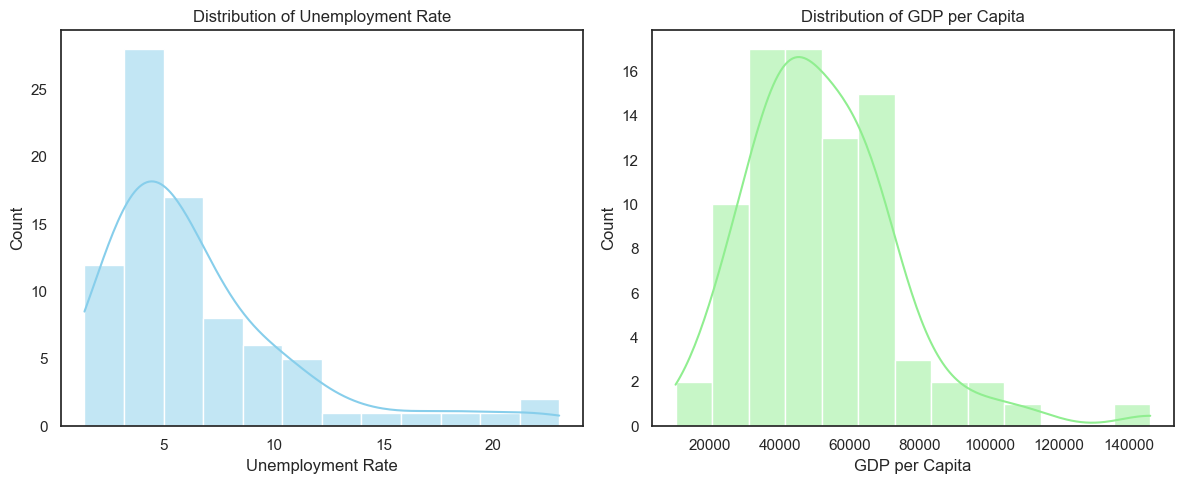

In [92]:
#How are Unemployement Rate and GDP per Capita distributed?
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(unemployment_rate, kde=True, color='skyblue')
plt.title('Distribution of Unemployment Rate')

plt.subplot(1,2,2)
sns.histplot(GDP_per_capita, kde=True, color='lightgreen')
plt.title('Distribution of GDP per Capita')

plt.tight_layout()
plt.show()

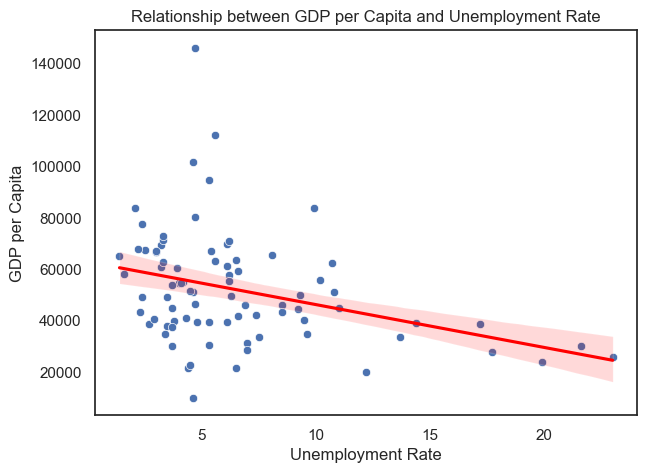

In [93]:
#Relationship between GDP per Capita and Unemployment Rate
plt.figure(figsize=(7,5))
sns.scatterplot(data=unempl_GDP, x= 'Unemployment Rate', y= 'GDP per Capita')
sns.regplot(data=unempl_GDP, x= 'Unemployment Rate', y= 'GDP per Capita', scatter=False, color='red')
plt.title('Relationship between GDP per Capita and Unemployment Rate')
plt.show()

The scatter plot illustrates the relationship between GDP per Capita and the Unemployment Rate.
The trend line shows a negative correlation between the two variables: as the unemployment rate increases, GDP per capita tends to decrease. This suggests that cities with higher unemployment rates generally exhibit lower levels of economic productivity per person.
However, the dispersion of data points indicates a certain degree of variability: some locations deviate from the general trend, showing relatively high GDP per capita even with moderate unemployment rates. The shaded region around the regression line suggest that while the overall relationship is negative, it is not perfectly linear.
Let's calclulate the Pearson correlation coefficient (we expect it to be negative).

In [94]:
corr = data_copy['GDP per Capita'].corr(data_copy['Unemployment Rate'])
print(f"Correlation: {corr:.2f}")

Correlation: -0.34


**Question 4.b** Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? What about the top 5 countries with the smallest average difference? Show these results with meaningful visualizations. 

In [95]:
#top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living
data_copy['diff']=data_copy['Average Monthly Salary']-data_copy['Average Cost of Living']
top5 = data_copy.sort_values(by='diff', ascending=False).head(5)
top5

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Languages,diff
10,Basel,Switzerland,793.0,550152,358020.0,21.5,5.3,94826.0,5,"German, English, French",6366,2500,4239,2023-01-19,"[German, English, French]",2127
34,Tampere,Finland,65.0,444370,283876.0,25.6,6.6,41954.0,0,Finnish,3500,850,1600,2024-04-29,[Finnish],1900
33,Helsinki,Finland,322.0,1507140,1004835.0,25.1,6.6,59502.0,0,"Finnish, Swedish, English",3900,1050,2050,2023-09-12,"[Finnish, Swedish, English]",1850
8,Zurich,Switzerland,1058.0,1384728,939270.0,22.3,4.7,80431.0,4,"German, English",6636,3190,4862,2023-05-06,"[German, English]",1774
9,Geneva,Switzerland,1112.0,597269,404313.0,23.8,9.9,83747.0,1,"French, English",5794,2818,4263,2024-09-28,"[French, English]",1531


The top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living are:
1. Basel
2. Tampere
3. Helsinki
4. Zurich
5. Geneva 

In [96]:
# top 5 countries with the smallest average difference
avg_diff = data_copy.groupby('Country')['diff'].mean()

top5_smallest = avg_diff.sort_values().head(5)

print("Top 5 countries with the smallest average difference between Average Monthly Salary and Average Cost of Living:")
for country, diff_value in top5_smallest.items():
    print(f"- {country}: average difference = {diff_value}")

Top 5 countries with the smallest average difference between Average Monthly Salary and Average Cost of Living:
- Portugal: average difference = -207.5
- Greece: average difference = -125.0
- Slovak Republic: average difference = -50.0
- Turkiye: average difference = -25.0
- Poland: average difference = -16.666666666666668


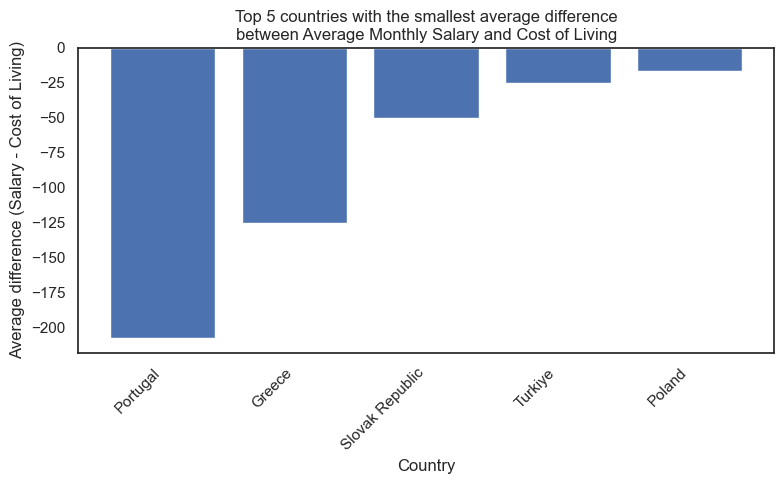

In [97]:
#Visualization 
plt.figure(figsize=(8, 5))

plt.bar(top5_smallest.index, top5_smallest.values)
plt.title("Top 5 countries with the smallest average difference\nbetween Average Monthly Salary and Cost of Living")
plt.xlabel("Country")
plt.ylabel("Average difference (Salary - Cost of Living)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

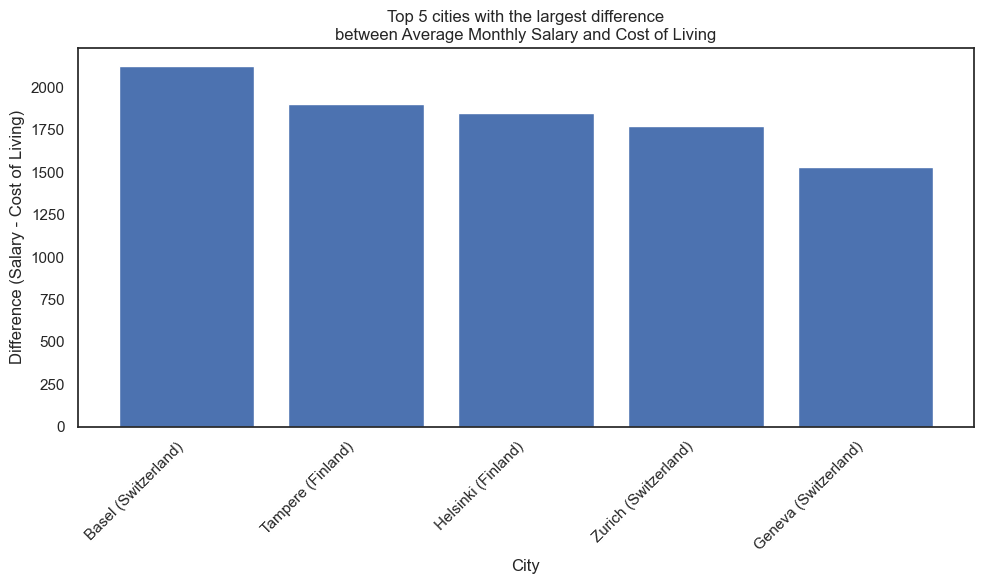

In [98]:
#Visualization
plt.figure(figsize=(10, 6))

city_labels = top5['City'] + " (" + top5['Country'] + ")"

plt.bar(city_labels, top5['diff'])
plt.title("Top 5 cities with the largest difference\nbetween Average Monthly Salary and Cost of Living")
plt.xlabel("City")
plt.ylabel("Difference (Salary - Cost of Living)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Question 4.c** Which is the best city for someone seeking: <br>
-An average monthly salary above €2000; <br>
-A cost of living below or equal to €1600 <br>
-A country suitable for starting a family (with a relatively larger youth population)?

In [99]:
data_copy=data_copy.drop(columns=['diff'])
youth_mean=data_copy['Youth Dependency Ratio'].mean()
data_copy[(data_copy['Average Monthly Salary']>2000)&(data_copy['Average Cost of Living']<=1600)&(data_copy['Youth Dependency Ratio']>youth_mean)]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Languages
4,Gent,Belgium,552.0,645813,417832.0,24.80,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,"[Dutch, French]"
30,Seville,Spain,330.0,1549641,1037225.0,25.00,21.6,30004.0,53,Spanish,2300,650,1150,2024-09-01,[Spanish]
34,Tampere,Finland,65.0,444370,283876.0,25.60,6.6,41954.0,0,Finnish,3500,850,1600,2024-04-29,[Finnish]
37,Toulouse,France,4300.0,511684,401425.0,27.31,8.5,46226.0,14,French,2600,800,1600,2024-02-20,[French]


The best city for someone seeking the characteristics above is Touluse, since it has the highest rate of young population and meets the other conditions too.
Also Seville, Gent and Tempere are suitable cities for someone looking for these features.

**Question 5** What are three additional insights you find meaningful when comparing the given cities?

### Insight 1: Youth Dependency Ratio vs Working Age Population
Cities with a high Youth Dependency Ratio have a larger share of young people relative to the working-age population. Cities with a larger Working Age Population have a stronger active labor force.
This analysis helps identify which cities are more likely to face better future labor challenges.

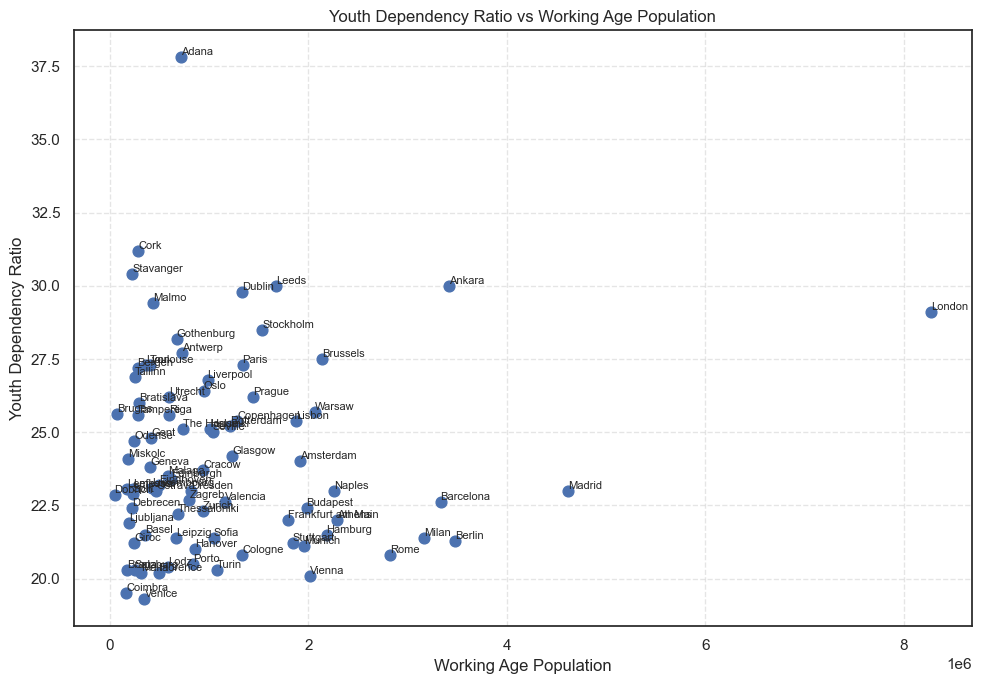

In [100]:
plt.figure(figsize=(10, 7))

# Scatter plot
plt.scatter(data_copy["Working Age Population "], data_copy["Youth Dependency Ratio"], s=60)

# City labels
for _, row in data_copy.iterrows():
    plt.text(
        row["Working Age Population "], 
        row["Youth Dependency Ratio"], 
        row["City"],
        fontsize=8,
        ha='left',
        va='bottom'
    )

plt.xlabel("Working Age Population")
plt.ylabel("Youth Dependency Ratio")
plt.title("Youth Dependency Ratio vs Working Age Population")

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

The scatter plot shows how cities differ in their demographic structure by comparing Working Age Population and Youth Dependency Ratio. <br>
1. Large metropolitan cities
Cities like London, Madrid, Barcelona, Berlin, Rome have very large working-age populations and moderate youth dependency. <br>
2. Smaller cities with high youth dependency
Cities such as Adana, Ankara, Cork, Stavanger have high youth dependency ratios and smaller working-age populations. These cities have younger populations and may face more pressure on education services. <br>
3. Most European cities cluster in a balanced zone, showing a mid-range working-age populations and youth dependency around 22–27%. This may indicate that they have balanced demographic profiles.

In [101]:
print(data_copy.columns)

Index(['City', 'Country', 'Population Density', 'Population',
       'Working Age Population ', 'Youth Dependency Ratio',
       'Unemployment Rate', 'GDP per Capita',
       'Days of very strong heat stress', 'Main Spoken Languages',
       'Average Monthly Salary', 'Average Rent Price',
       'Average Cost of Living', 'Last Data Update', 'Languages'],
      dtype='object')


### Insight 2: Unemployment vs Salary
Comparing unemployment rate and average salary across cities helps reveal economic strength: cities with high salaries and low unemployment tend to have, strong labor markets and high productivity; meanwhile cities with high unemployment and low salaries may indicate weaker job markets.

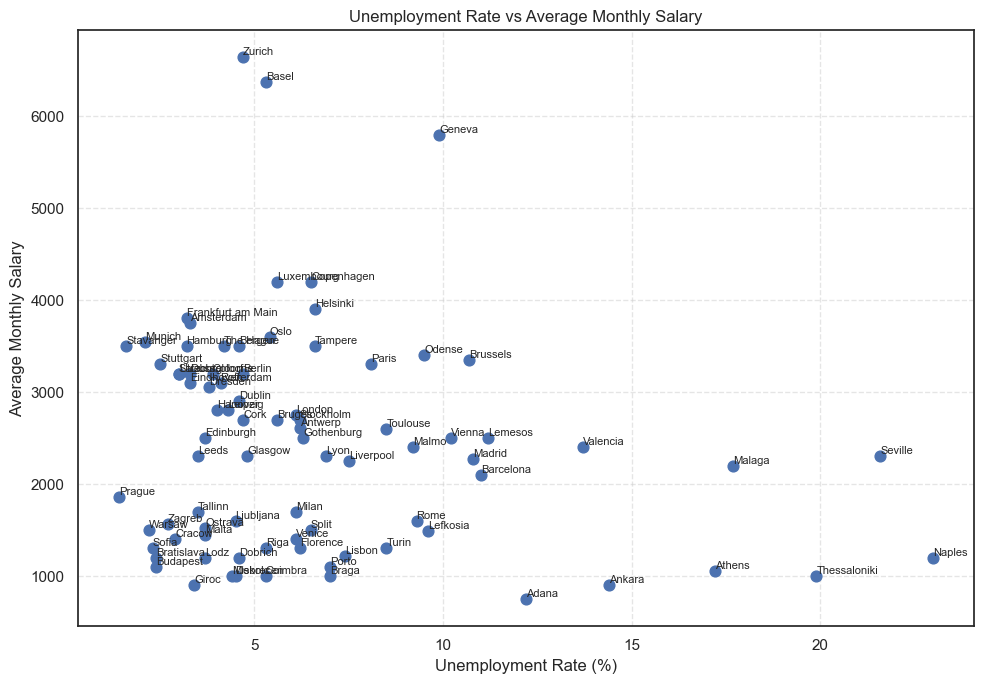

In [102]:
plt.figure(figsize=(10, 7))

plt.scatter(data_copy["Unemployment Rate"], data_copy["Average Monthly Salary"], s=60)

for _, row in data_copy.iterrows():
    plt.text(
        row["Unemployment Rate"],
        row["Average Monthly Salary"],
        row["City"],
        fontsize=8,
        ha='left',
        va='bottom'
    )

plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Average Monthly Salary")
plt.title("Unemployment Rate vs Average Monthly Salary")

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

The scatter plot shows that cities like Zurich, Basel, and Geneva have very high salaries and low unemployment, indicating strong and productive labor markets. Many Northern and Western European cities (Amsterdam, Copenhagen, Helsinki, Munich) group together with moderate unemployment and middle-high salaries. In contrast, several Southern and Eastern European cities—such as Naples, Thessaloniki, Athens, Adana, and Ankara—show high unemployment and significantly lower salaries, highlighting weaker labor market performance. Cities like Valencia, Madrid, Barcelona fall in the middle, with moderate salaries but elevated unemployment.

### Insight 3: heat-stress
The number of days with very strong heat stress is an important factor for assessing quality of life and health risks, especially for children, the elderly and people with medical conditions. 
In addition to this, frequent heat-stress days can increase energy costs (e.g., air conditioning) and affect productivity. From a long-term perspective, this indicator also signals climate resilience: cities with fewer extreme-heat days may offer a more stable, comfortable environment. Overall heat stress is an important factor to think about when evaluating long-term livability.

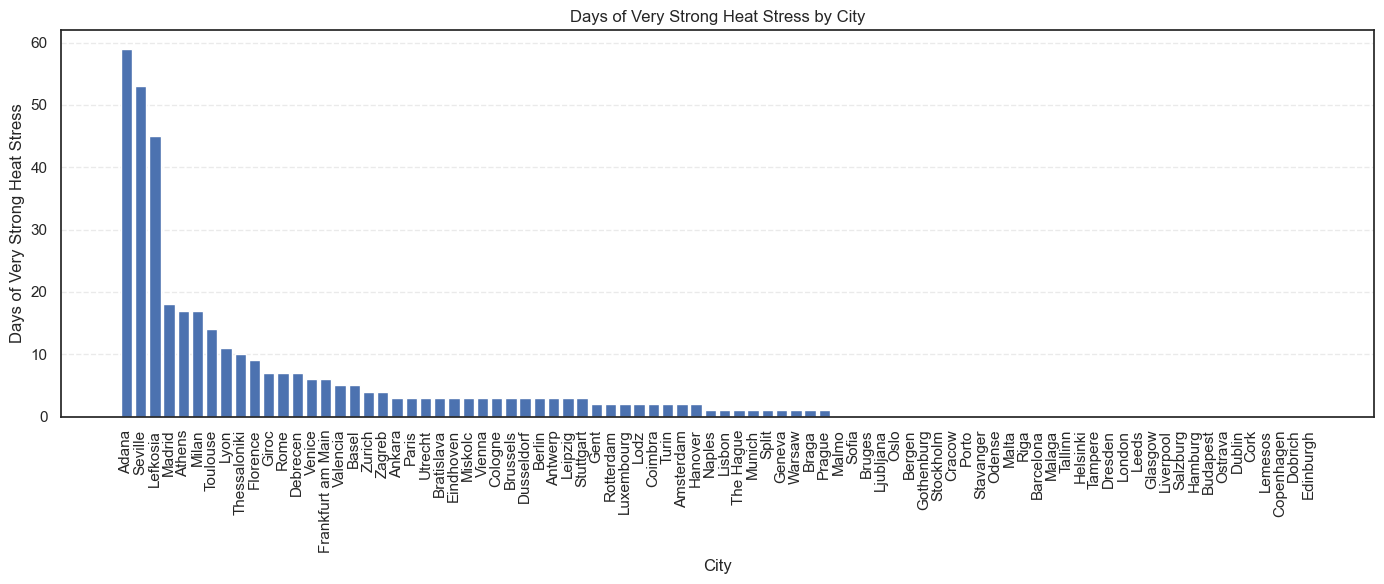

In [103]:
data_copy_sorted = data_copy.dropna(subset=["Days of very strong heat stress"]).sort_values("Days of very strong heat stress", ascending=False)
plt.figure(figsize=(14, 6))

plt.bar(data_copy_sorted["City"], data_copy_sorted["Days of very strong heat stress"])

plt.title("Days of Very Strong Heat Stress by City")
plt.xlabel("City")
plt.ylabel("Days of Very Strong Heat Stress")
plt.xticks(rotation=90)        
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()

The chart shows that southern cities like Adana, Seville, Lefkosia, and Athens experience very high numbers of extreme heat-stress days, suggesting significant climate pressure and low comfort during summer. As expected, many Northern cities—such as Edinburgh, Dublin, Copenhagen, Helsinki, and Stockholm have almost no heat-stress days, indicating much cooler and more stable conditions.

## <span style= 'color: blue'> 2. Interactive Map </span>

The goal of this section is to create an interactive map of Europe where users can explore cities and view relevant information such as country, population, average salary, and cost of living.

### Web scraping

In [104]:
!pip install beautifulsoup4   
!pip install selenium 
!pip install requests

For the web scraping procedure, Selenium was used to automatically navigate Wikipedia, search for each city, and extract geographic coordinates from the corresponding city pages. In some cases (e.g., Split and Cork), the original city names had to be adjusted (such as “Split, Croatia” and “Cork (city)”) to correctly match the corresponding Wikipedia page. <br>
Madrid does not provide coordinates on Wikipedia, which resulted in a missing value during the scraping process. For this reason, the coordinates of Madrid were manually  added using an external and reliable source (Google). Conceptually, this value can be treated as a missing observation, and therefore it would have also been acceptable to drop this entry from the dataset.

In [105]:
#necessary library are imported
from bs4 import BeautifulSoup        
import requests  
from urllib.parse import quote

In [106]:
cities=data_copy['City'].str.replace('Gent', 'Ghent').str.replace('Split','Split, Croatia').str.replace ('Cork', 'Cork (city)').to_list()

In [107]:
def get_coords(city):

    url = f"https://en.wikipedia.org/wiki/{quote(city.replace(' ', '_'))}"
    
    headers = {"User-Agent": "Mozilla/5.0"} 
    r = requests.get(url, headers=headers)
    
    if r.status_code != 200:
        return None, None
    
    soup = BeautifulSoup(r.text, "html.parser")
    
    lat_tag = soup.find("span", class_="latitude")
    lon_tag = soup.find("span", class_="longitude")
    
    if lat_tag and lon_tag:
        return lat_tag.text, lon_tag.text
    else:
        return None, None
    


latitude = []
longitude = []

for city in cities:
    lat, lon = get_coords(city)
    latitude.append(lat)
    longitude.append(lon)
    print(f"{city}  {lat}, {lon}")

data_copy["latitude"] = latitude
data_copy["longitude"] = longitude



Vienna  48°12′30″N, 16°22′21″E
Salzburg  47°48′00″N, 13°02′42″E
Brussels  50°50′48″N, 04°21′09″E
Antwerp  51°13′04″N, 04°24′01″E
Ghent  51°03′13″N, 03°43′31″E
Bruges  51°12′32″N, 03°13′27″E
Sofia  42°42′N, 23°20′E
Dobrich  43°34′N, 27°50′E
Zurich  47°22′28″N, 08°32′28″E
Geneva  46°12′06″N, 06°08′49″E
Basel  47°33′17″N, 07°35′26″E
Lefkosia  35°10′21″N, 33°21′54″E
Lemesos  34°40′29″N, 33°02′39″E
Prague  50°5′15″N, 14°25′17″E
Ostrava  49°50′8″N, 18°17′33″E
Berlin  52°31′12″N, 13°24′18″E
Hamburg  53°33′N, 10°00′E
Munich  48°08′15″N, 11°34′30″E
Cologne  50°56′11″N, 6°57′10″E
Frankfurt am Main  50°06′38″N, 08°40′56″E
Stuttgart  48°46′39″N, 09°10′48″E
Leipzig  51°20′24″N, 12°22′30″E
Dresden  51°03′00″N, 13°44′24″E
Dusseldorf  51°13′32″N, 6°46′36″E
Hanover  52°22′N, 9°43′E
Copenhagen  55°40′34″N, 12°34′06″E
Odense  55°23′45″N, 10°23′19″E
Madrid  40°30′N, 3°40′W
Barcelona  41°23′N, 2°11′E
Valencia  39°28′12″N, 00°22′35″W
Seville  37°23′24″N, 5°59′24″W
Malaga  36°43′10″N, 4°25′12″W
Tallinn  59°2

In [108]:
data_copy.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Languages,latitude,longitude
0,Vienna,Austria,310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,"[German, English, Turkish, Serbian]",48°12′30″N,16°22′21″E
1,Salzburg,Austria,243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,[German],47°48′00″N,13°02′42″E
2,Brussels,Belgium,681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,"[French, Dutch, Arabic, English]",50°50′48″N,04°21′09″E
3,Antwerp,Belgium,928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,"[Dutch, French, Arabic]",51°13′04″N,04°24′01″E
4,Gent,Belgium,552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,"[Dutch, French]",51°03′13″N,03°43′31″E


In [109]:
# Coordinates of Madrid
madrid_lat = "40°25′10″N"
madrid_lon = "3°42′14″W"
# Set coordinates for all rows where city == "Madrid"
mask = data_copy["City"] == "Madrid"
data_copy.loc[mask, "latitude"] = madrid_lat
data_copy.loc[mask, "longitude"] = madrid_lon

In [110]:
#double check 
data_copy[data_copy['City']=='Madrid']

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Languages,latitude,longitude
27,Madrid,Spain,873.0,6882461,4617753.0,23.0,10.8,51020.0,18,Spanish,2271,1100,1589,2023-05-14,[Spanish],40°25′10″N,3°42′14″W


### Interactive Map

In this step we build an interactive map of European cities using the geographic coordinates previously scraped.
With geopandas we load a polygon map of Europe and convert our data_copy table of cities into a GeoDataFrame of points.
Each city is displayed as a marker on the map; when the user hovers on a marker, a popup shows: <br>
-The country <br>
-The population <br>
-The average monthly salary <br>
-The average cost of living <br>

In [111]:
!pip install geopandas
!pip install geopy
!pip install geodatasets

In [112]:
#Necessary library are imported
import geopandas as gpd

*Check*: are there missing values in the columns that contain the information we want to include in the map?

In [132]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             84 non-null     object        
 1   Country                          84 non-null     object        
 2   Population Density               83 non-null     float64       
 3   Population                       84 non-null     int64         
 4   Working Age Population           83 non-null     float64       
 5   Youth Dependency Ratio           84 non-null     float64       
 6   Unemployment Rate                83 non-null     float64       
 7   GDP per Capita                   83 non-null     float64       
 8   Days of very strong heat stress  84 non-null     int64         
 9   Main Spoken Languages            83 non-null     object        
 10  Average Monthly Salary           84 non-null     int64         


**Step 1** A function is created to transform coordinates from DMS string to decimal degrees. This is a necessary step to build the Europe map using Geopandas.

In [133]:
# DMS string → decimal degrees

def dms_to_decimal(value):
    s = str(value).strip()

    # Handle empty / None / 'nan'
    if s.lower() in ("none", "", "nan"):
        return np.nan

    # If there are no DMS symbols and no N/S/E/W, try direct float
    if not any(ch in s.upper() for ch in ["N", "S", "E", "W", "°", "′", "”", "″"]):
        try:
            return float(s)
        except ValueError:
            return np.nan

    # South and West are negative
    sign = -1 if ("S" in s.upper() or "W" in s.upper()) else 1

    # Extract numeric parts: degrees, minutes, seconds
    nums = re.findall(r"\d+", s)
    if len(nums) == 0:
        return np.nan

    degrees = float(nums[0])
    minutes = float(nums[1]) if len(nums) > 1 else 0.0
    seconds = float(nums[2]) if len(nums) > 2 else 0.0

    decimal = degrees + minutes / 60 + seconds / 3600
    return sign * decimal

# Create decimal latitude/longitude for mapping

data_copy["lat_dd"] = data_copy["latitude"].apply(dms_to_decimal)
data_copy["lon_dd"] = data_copy["longitude"].apply(dms_to_decimal)

# Remove rows with invalid coordinates
data_copy = data_copy.dropna(subset=["lat_dd", "lon_dd"]).reset_index(drop=True)

**Step 2** Creating a GeoDataFrame from data_copy.

In [134]:
#df cointains only the information we need to show on the map

df = data_copy.drop(columns=['City','Population Density', 'Working Age Population ', 'Youth Dependency Ratio',
                    'Unemployment Rate', 'GDP per Capita', 'Days of very strong heat stress',
                    'Main Spoken Languages', 'Average Rent Price', 'Last Data Update', 
                             'Languages', 'latitude', 'longitude'])

cities_gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["lon_dd"], df["lat_dd"]),
    crs="EPSG:4326"    # geographic coordinates (lat/lon)
)

**Step 3** Building the map using GeoPandas.

In [136]:
# Load the world map from the built-in Natural Earth dataset and select Europe

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
europe = world[world["continent"] == "Europe"].copy()

# Changing the coordinate system for nicer visualization

cities_gdf = cities_gdf.to_crs(epsg=3857)
europe = europe.to_crs(epsg=3857)

# Europe background 

base = europe.explore(
    tiles="CartoDB positron", #clean style
    style_kwds={
        "fill": False,        # do not fill polygons 
        "fillOpacity": 0,     # ensure no fill color is applied
        "color": None,        # no border color
        "weight": 0           # no border line
    },
    tooltip=False,
    popup=False
)

# City points on top of the existing map

m = cities_gdf.explore(
    m=m,               # add to the existing map 'm'
    color="red", # marker color for the cities
    tooltip=list(df.drop(columns=['lat_dd','lon_dd']).columns),   # ONLY columns from df will appear
    popup=list(df.drop(columns=['lat_dd','lon_dd']).columns),     # same for popup
    marker_kwds={"radius": 6}
)

m  


/var/folders/dc/jfb4p3vj5q9dcq1f9lcgzl5c0000gn/T/ipykernel_26208/1305924774.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
